In [1]:
"""
Created on Wed Jun 20 12:05:56 2018

@author: swbatta
"""

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
sns.set_style("darkgrid")


In [2]:


#Importing consolidated data file

raw_data=pd.read_excel(r"C:\Users\SwBatta\Documents\ML Guild contest\Hackathon\Consolidated dataset piece V3.xlsx",sheetname=0)

print("Raw data shape: ",raw_data.shape)

columns_to_include =pd.read_excel(r"C:\Users\SwBatta\Documents\ML Guild contest\Hackathon\Diabetes Feature selection.xlsx")

columns_list=columns_to_include[columns_to_include['Selected/not']=="Selected"].Variables.tolist()

print("Number of features selected: ",len(columns_list))



Raw data shape:  (3143, 289)
Number of features selected:  15


In [4]:
#Data manipulation: Convert FIPS to string

raw_data['FIPS']=raw_data['FIPS'].astype(str)
reduced_data = raw_data[columns_list]

data_N = reduced_data
# Select only numeric data(drops State)

numerical_features = data_N.select_dtypes(include=[np.number]).columns.tolist()

#Checking for missing values

Missing_values=pd.DataFrame(data_N).isnull().sum().sort_values(ascending=False)
print("Missing_values")
print(Missing_values)

#Imputing missing values with median

for column in numerical_features:
    data_N[column]=data_N[column].fillna(data_N[column].median())

#Checking for missing values

Missing_values_new=pd.DataFrame(data_N).isnull().sum().sort_values(ascending=False)
print("Missing_values after imputation")
print(Missing_values_new)


Missing_values
Adult diabetes rate, 2008                          5
Population-loss counties, 2010                     2
Per Capita income, 2009                            0
Metro/nonmetro counties, 2010                      0
Persistent-poverty counties, 2010                  0
% Population 65 years or older, 2010               0
Recreation & fitness facilities/1,000 pop, 2009    0
Expenditures per capita, restaurants, 2007*        0
Expenditures per capita, fast food, 2007*          0
Fast-food restaurants/1,000 pop, 2009              0
WIC-authorized stores/1,000 pop, 2008              0
SNAP-authorized stores/1,000 pop, 2012             0
Grocery stores/1,000 pop, 2009                     0
Population, low access to store (%), 2010          0
FIPS                                               0
dtype: int64


C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Missing_values after imputation
Per Capita income, 2009                            0
Population-loss counties, 2010                     0
Metro/nonmetro counties, 2010                      0
Persistent-poverty counties, 2010                  0
% Population 65 years or older, 2010               0
Recreation & fitness facilities/1,000 pop, 2009    0
Adult diabetes rate, 2008                          0
Expenditures per capita, restaurants, 2007*        0
Expenditures per capita, fast food, 2007*          0
Fast-food restaurants/1,000 pop, 2009              0
WIC-authorized stores/1,000 pop, 2008              0
SNAP-authorized stores/1,000 pop, 2012             0
Grocery stores/1,000 pop, 2009                     0
Population, low access to store (%), 2010          0
FIPS                                               0
dtype: int64


In [5]:

# What is the national average rate of diabetes?
print('diabetes:', data_N['Adult diabetes rate, 2008'].mean())

# Create the target variable (diabetes)
data_N['hi_diabetes']=0
data_N.loc[data_N['Adult diabetes rate, 2008']>data_N['Adult diabetes rate, 2008'].mean(), 'hi_diabetes']=1
data_N['hi_diabetes'].value_counts()


#Defining dependent variable


dep_var = ['hi_diabetes']

y = data_N[dep_var]
   
data_T=data_N[numerical_features]

# Feature Scaling

sc = StandardScaler()
X = sc.fit_transform(data_T)

X_T = pd.DataFrame(X, columns = numerical_features)


diabetes: 9.91307667833283


C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:

#Splitting the data between train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_T, y, test_size=0.2, random_state=42)

#Observing the correlations between variables

corrmat = X_train.corr()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [6.0, 4.0]
#print("Current size:",fig_size) 

 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size



In [7]:

#Plotting a heatmap to observe the correlations

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

#Observing the correlations of features with target variable

target = y_train.columns.values[0]

features = X_train.columns.tolist()
print(features)



remove=['Adult diabetes rate, 2008']

 
features_N = list(set(features) - set(remove))
print(features_N)

X_train_new = X_train[features_N]
X_test_new = X_test[features_N]
print(y_train.shape)
print(X_test_new.shape)


['Population, low access to store (%), 2010', 'Grocery stores/1,000 pop, 2009', 'SNAP-authorized stores/1,000 pop, 2012', 'WIC-authorized stores/1,000 pop, 2008', 'Fast-food restaurants/1,000 pop, 2009', 'Expenditures per capita, fast food, 2007*', 'Expenditures per capita, restaurants, 2007*', 'Adult diabetes rate, 2008', 'Recreation & fitness facilities/1,000 pop, 2009', '% Population 65 years or older, 2010', 'Persistent-poverty counties, 2010', 'Metro/nonmetro counties, 2010', 'Population-loss counties, 2010', 'Per Capita income, 2009']
['Metro/nonmetro counties, 2010', 'Grocery stores/1,000 pop, 2009', 'Population, low access to store (%), 2010', 'SNAP-authorized stores/1,000 pop, 2012', 'Persistent-poverty counties, 2010', 'Population-loss counties, 2010', 'Expenditures per capita, fast food, 2007*', 'Fast-food restaurants/1,000 pop, 2009', 'Recreation & fitness facilities/1,000 pop, 2009', 'Expenditures per capita, restaurants, 2007*', 'WIC-authorized stores/1,000 pop, 2008', 'P

In [10]:

###### Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 42, min_samples_leaf=20)
classifier.fit(X_train_new, y_train.values.flatten())

#Applying grid search to find the best model and best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'min_samples_leaf':[20,30,50,100,200],'n_estimators':[5,10,15,20,25,30,35,40]}
        ]
grid_search = GridSearchCV(estimator=classifier, param_grid = parameters, scoring = 'accuracy', cv=5)

grid_search = grid_search.fit(X_train_new, y_train.values.flatten())
best_accuracy = grid_search.best_score_
print("best accuracy:",best_accuracy)
best_parameters  = grid_search.best_params_
print("best parameters:",best_parameters)


best accuracy: 0.8062848050914877
best parameters: {'min_samples_leaf': 20, 'n_estimators': 35}


In [11]:
# Found the best params to be...

classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 42, min_samples_leaf=20)
classifier.fit(X_train_new, y_train.values.flatten())

feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances.shape)

new_features = feature_importances[feature_importances.importance>0.03].index.values

X_train_new1 = X_train_new[new_features]
X_test_new1 = X_test_new[new_features]

classifier.fit(X_train_new1, y_train.values.flatten())

#Applying Cross Validation; printing the mean score and the 95% confidence interval of the score estimate
scores = cross_val_score(classifier, X_train_new1, y_train.values.flatten(), cv=5)
print("K fold Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Predicting the Test set results 
y_pred = classifier.predict(X_test_new1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
test_set_accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("test set accuracy:",test_set_accuracy)

#Computing Precision
from sklearn.metrics import precision_score
Precision=precision_score(y_test,y_pred)
print("test set Precision:",Precision)

#Computing Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test,y_pred)
print("test set Recall:",Recall)


#Computing F1 Score
from sklearn.metrics import f1_score
F1_Score=f1_score(y_test,y_pred)
print("test set F1 Score:",F1_Score)


(13, 1)
K fold Accuracy: 0.81 (+/- 0.04)
test set accuracy: 0.8282988871224165
test set Precision: 0.856655290102389
test set Recall: 0.7917981072555205
test set F1 Score: 0.8229508196721311


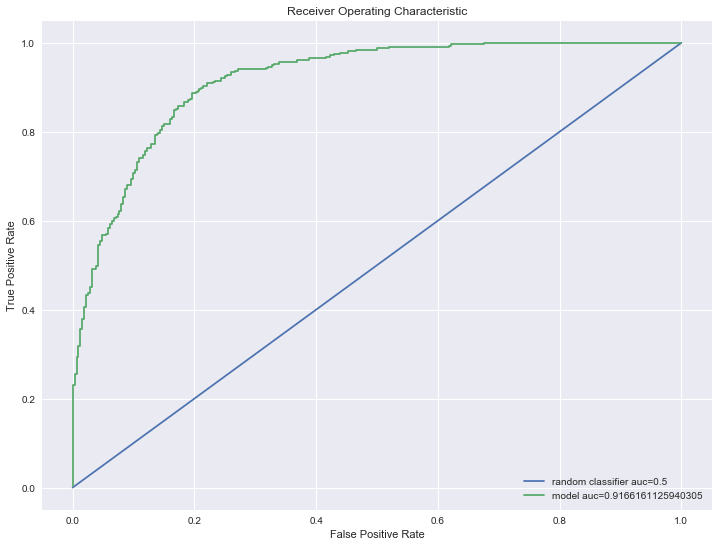

In [13]:

#ROC-AUC
y_pred_probab = classifier.predict_proba(X_test_new1)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probab)
auc = metrics.roc_auc_score(y_test, y_pred_probab)
plt.title('Receiver Operating Characteristic')
plt.plot([0,1],[0,1],label="random classifier auc=0.5")
plt.plot(fpr,tpr,label="model auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SwBatta\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

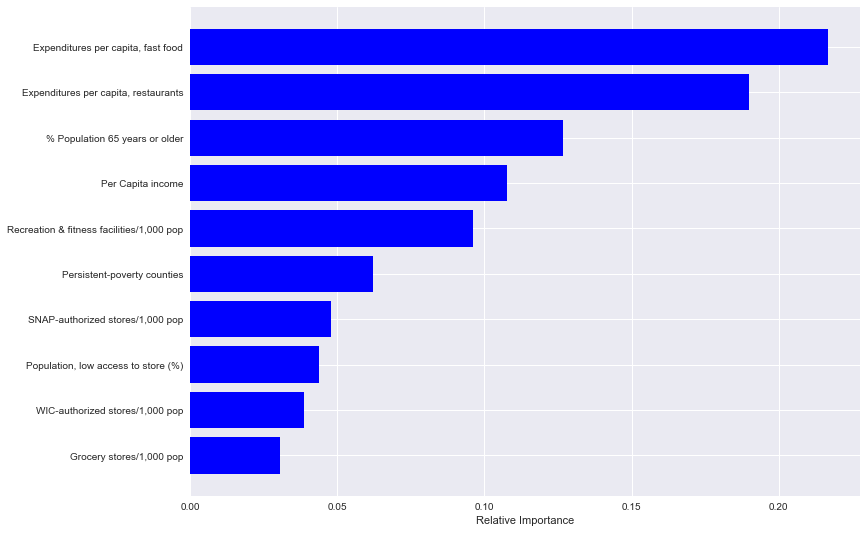

In [14]:
#Feature importance
features_IMP =  feature_importances[feature_importances.importance>0.03]

#Remove year from Feature name
features_IMP['feature']=features_IMP.index.values
features_IMP['feature_new']= features_IMP['feature'].str.strip()
features_IMP['feature_new']=features_IMP['feature_new'].str.split(",")
features_IMP['len']= features_IMP['feature_new'].str.len()-1
for i in features_IMP['len'].astype(int):
    features_IMP['Req feature name']=features_IMP['feature_new'].str[:-i+1]
features_IMP['New feature name']=""
for i in range(len(features_IMP)):
    features_IMP['New feature name'].iloc[i] = ','.join(features_IMP.iloc[i,4])
 
plt.barh(range(len(features_IMP['importance'])), features_IMP['importance'], color='b', align='center')
plt.yticks(range(len(features_IMP['importance'])), features_IMP['New feature name'])
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.show()

In [15]:

#Exporting FIPS and pred probabilities
X_F=X_train_new1.append(X_test_new1)

Y_F=y_train.append(y_test)

# Predicting the Test set results 
y_hats2 = classifier.predict(X_F)

PP = classifier.predict_proba(X_F)[:,1]

X_F['Pred_prob']=PP

Final_file = pd.merge(X_F['Pred_prob'].to_frame(), data_N['FIPS'].to_frame(), left_index=True, right_index=True)

Final_file.to_csv(r"C:\Users\SwBatta\Documents\ML Guild contest\Hackathon\Diabetes_RF_pred_probabilities.csv")


